In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "marche"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,11,Marche,0,0,0,0,0,0,0,...,0.0,5.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,11,Marche,1,0,1,0,1,1,1,...,0.0,7.0,0.0,0.0,0.00,100.00,14.29,0.00,0.00,0.00
2,2020-02-27T18:00:00,11,Marche,2,1,3,0,3,2,2,...,0.0,18.0,0.0,0.0,33.33,100.00,11.11,0.00,0.00,200.00
3,2020-02-28T18:00:00,11,Marche,3,2,5,1,6,3,3,...,0.0,1.0,0.0,1.0,40.00,83.33,300.00,0.00,100.00,100.00
4,2020-02-29T17:00:00,11,Marche,6,2,8,3,11,5,5,...,0.0,21.0,0.0,2.0,25.00,72.73,23.81,0.00,0.00,83.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021-02-14T17:00:00,11,Marche,544,80,624,7506,8130,51,355,...,8.0,4380.0,2455.0,44.0,12.82,7.68,8.11,14.46,6.67,0.63
356,2021-02-15T17:00:00,11,Marche,537,83,620,7524,8144,14,128,...,12.0,1120.0,601.0,18.0,13.39,7.61,11.43,21.30,3.75,0.17
357,2021-02-16T17:00:00,11,Marche,535,80,615,7390,8005,-139,277,...,4.0,4962.0,2995.0,-134.0,13.01,7.68,5.58,9.25,-3.61,-1.71
358,2021-02-17T17:00:00,11,Marche,534,78,612,7543,8155,150,471,...,15.0,5891.0,3483.0,153.0,12.75,7.50,8.00,13.52,-2.50,1.87


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 18, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 532
Nuovi tamponi: 7399.0
Percentuale nuovi positivi/nuovi tamponi: 7.199999999999999 %
Nuovi guariti: 314.0
Nuovi deceduti: 17.0
Variazione positivi ricoverati con sintomi: -14.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: 214.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 18, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-20T17:00:00,11,Marche,416,64,480,9281,9761,-309,372,...,7.0,4621.0,3144.0,-308.0,13.33,4.92,8.05,11.83,-1.54,-3.07
1,2020-12-21T17:00:00,11,Marche,423,63,486,9111,9597,-164,162,...,8.0,1434.0,889.0,-170.0,12.96,5.06,11.30,18.22,-1.56,-1.68
2,2020-12-22T17:00:00,11,Marche,421,61,482,9015,9497,-100,363,...,7.0,4162.0,2758.0,-96.0,12.66,5.08,8.72,13.16,-3.17,-1.04
3,2020-12-23T17:00:00,11,Marche,411,61,472,9087,9559,62,498,...,4.0,6090.0,3992.0,72.0,12.92,4.94,8.18,12.47,0.00,0.65
4,2020-12-24T17:00:00,11,Marche,409,64,473,8942,9415,-144,415,...,9.0,5613.0,3646.0,-145.0,13.53,5.02,7.39,11.38,4.92,-1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-14T17:00:00,11,Marche,544,80,624,7506,8130,51,355,...,8.0,4380.0,2455.0,44.0,12.82,7.68,8.11,14.46,6.67,0.63
57,2021-02-15T17:00:00,11,Marche,537,83,620,7524,8144,14,128,...,12.0,1120.0,601.0,18.0,13.39,7.61,11.43,21.30,3.75,0.17
58,2021-02-16T17:00:00,11,Marche,535,80,615,7390,8005,-139,277,...,4.0,4962.0,2995.0,-134.0,13.01,7.68,5.58,9.25,-3.61,-1.71
59,2021-02-17T17:00:00,11,Marche,534,78,612,7543,8155,150,471,...,15.0,5891.0,3483.0,153.0,12.75,7.50,8.00,13.52,-2.50,1.87


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

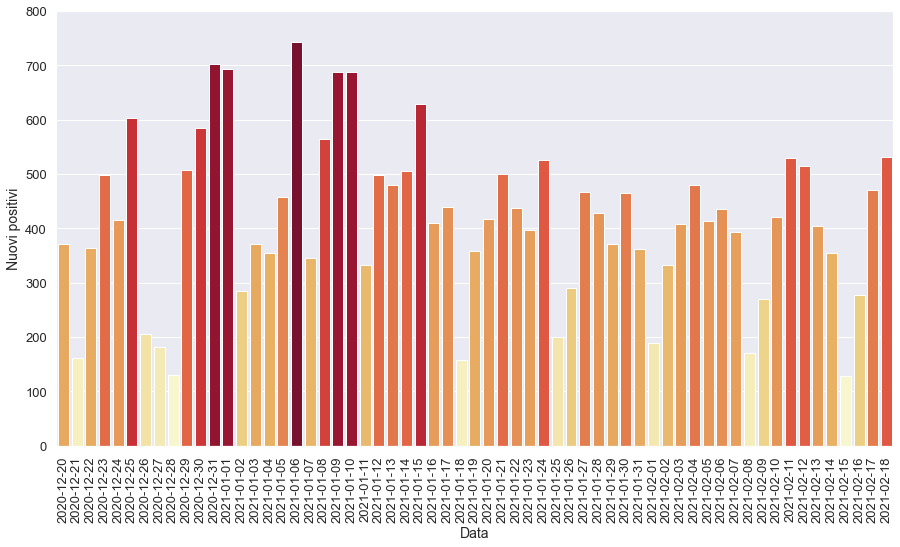

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

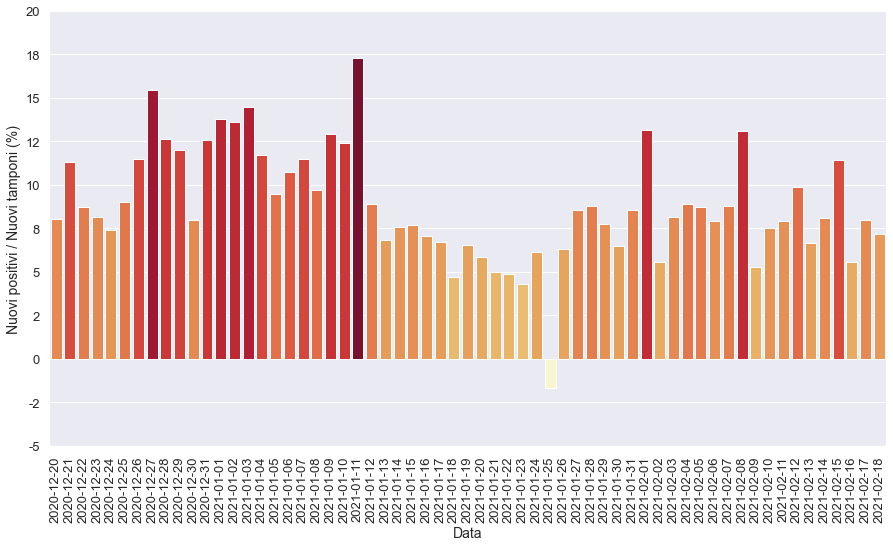

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

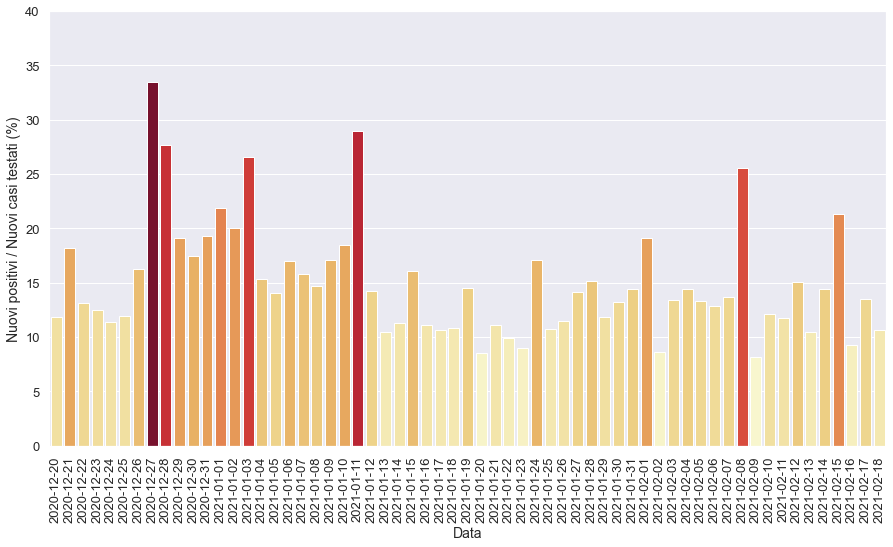

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

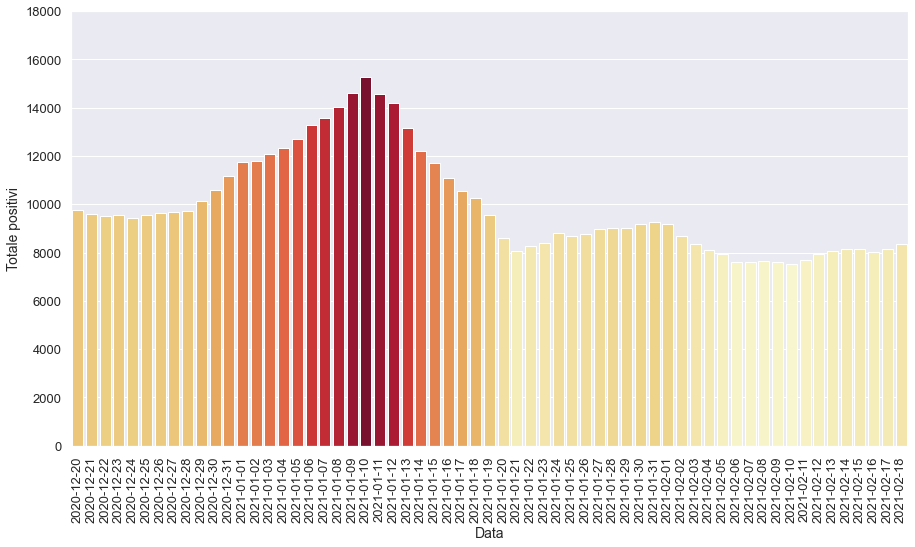

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

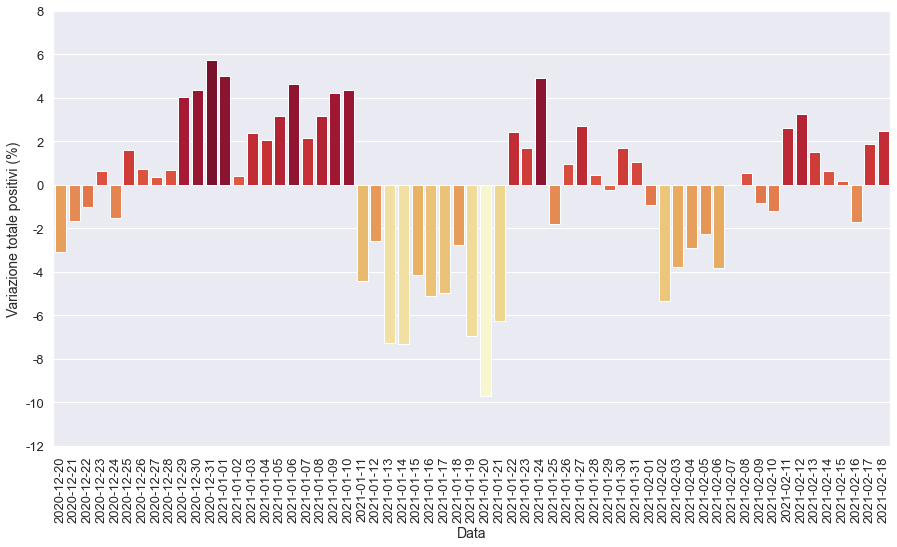

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

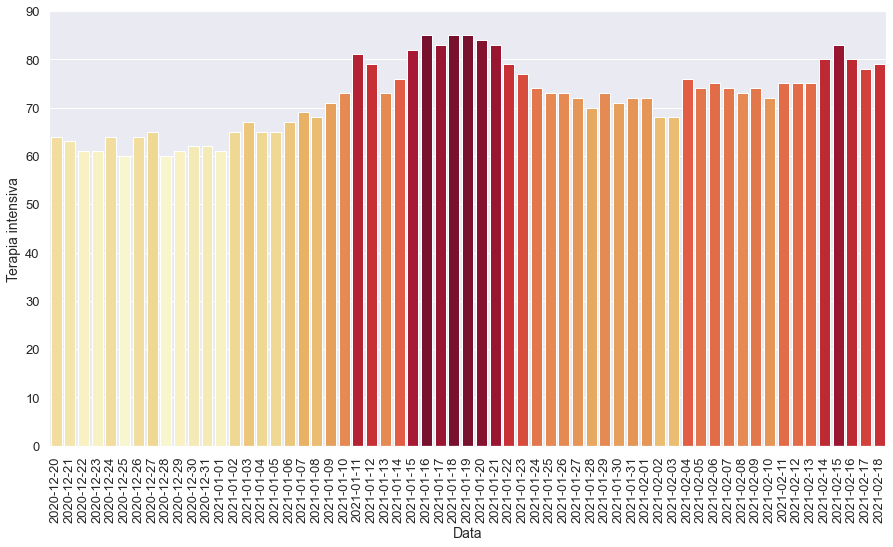

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

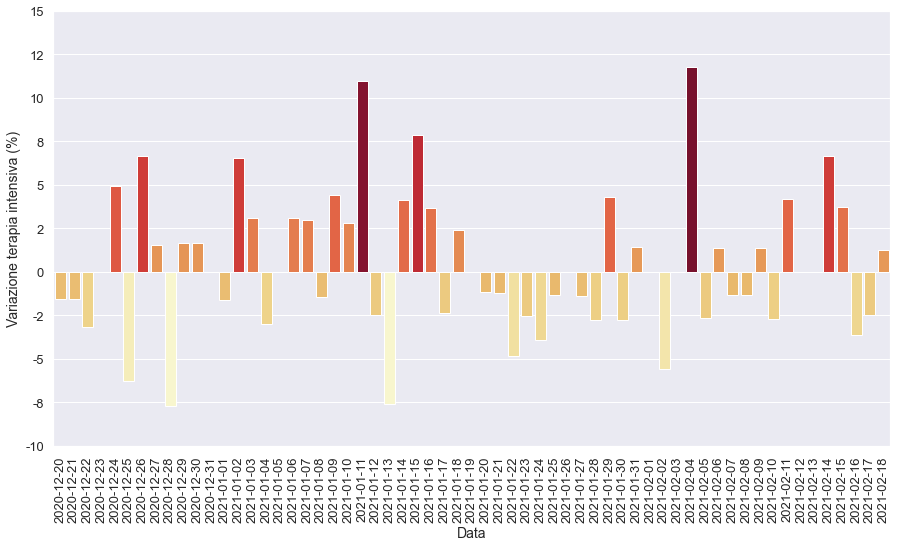

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

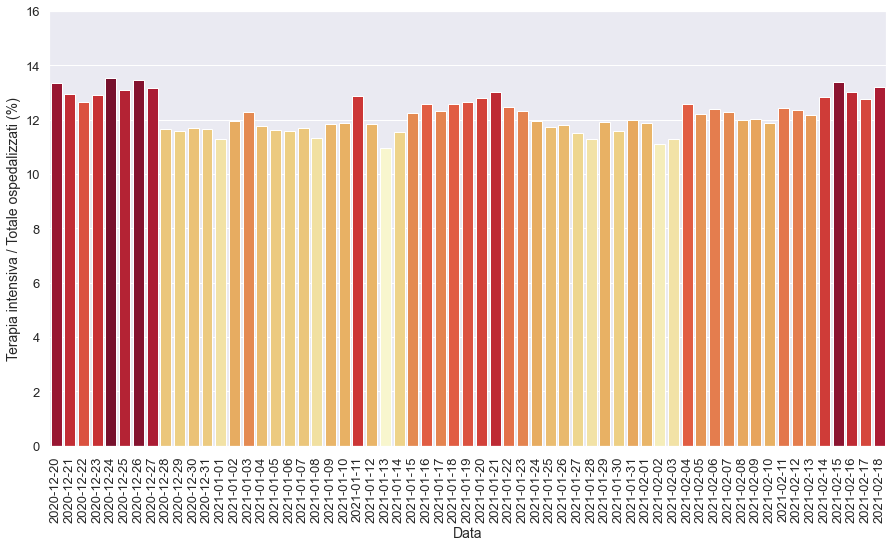

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

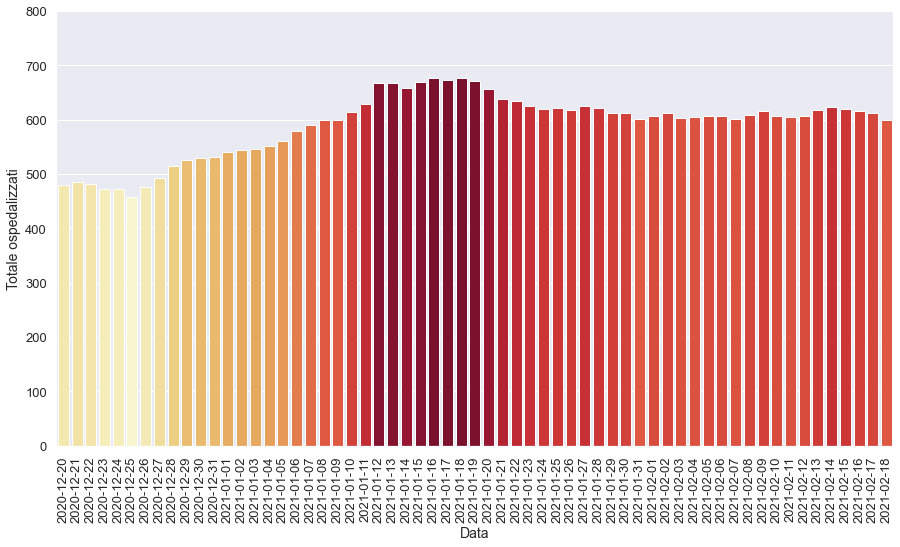

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

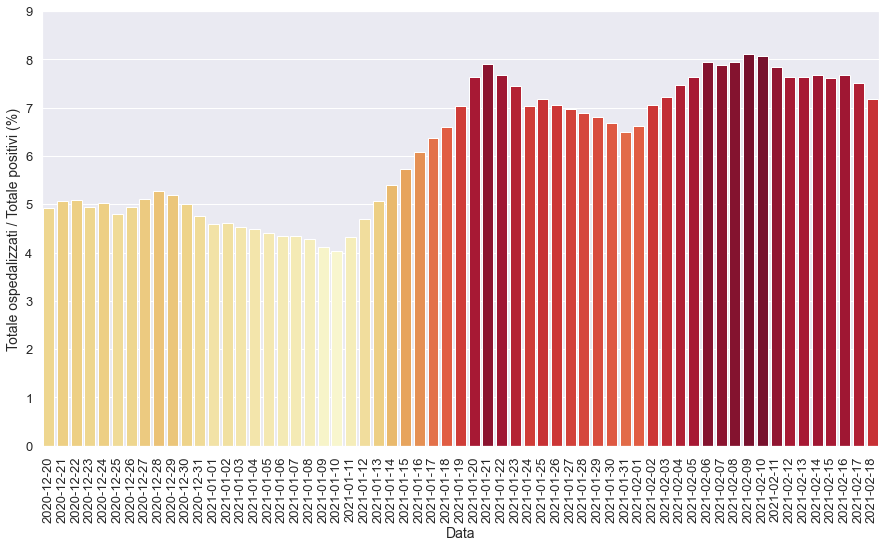

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

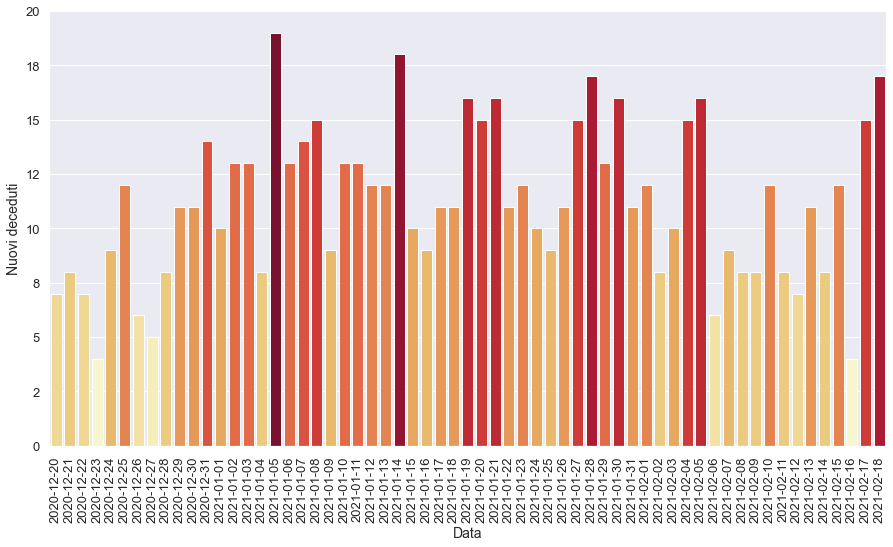

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

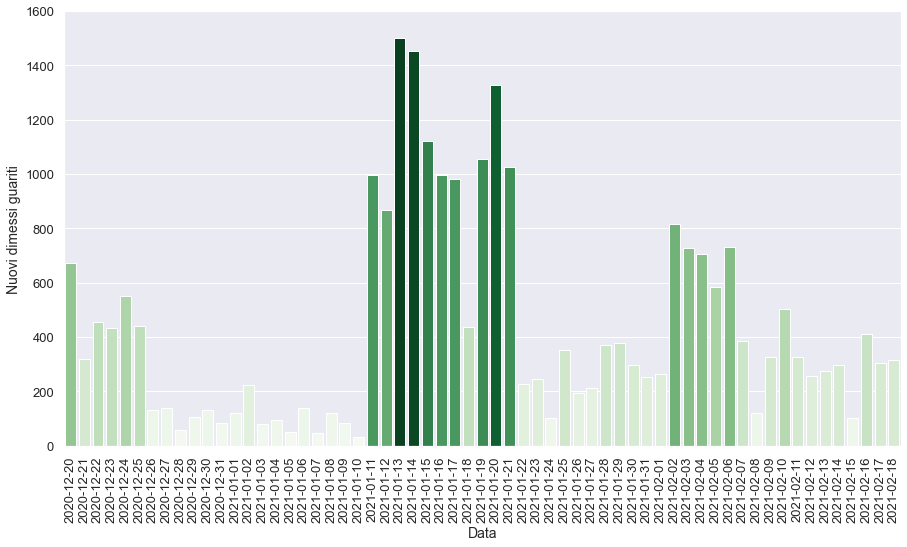

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-19T17:00:00,11,Marche,587,85,672,8868,9540,-711,359,...,16.0,5504.0,2481.0,-707.0,12.65,7.04,6.52,14.47,0.00,-6.94
1,2021-01-20T17:00:00,11,Marche,573,84,657,7958,8615,-925,417,...,15.0,7122.0,4876.0,-910.0,12.79,7.63,5.86,8.55,-1.18,-9.70
2,2021-01-21T17:00:00,11,Marche,555,83,638,7436,8074,-541,500,...,16.0,9953.0,4508.0,-522.0,13.01,7.90,5.02,11.09,-1.19,-6.28
3,2021-01-22T17:00:00,11,Marche,555,79,634,7637,8271,197,437,...,11.0,9012.0,4415.0,201.0,12.46,7.67,4.85,9.90,-4.82,2.44
4,2021-01-23T17:00:00,11,Marche,549,77,626,7785,8411,140,397,...,12.0,9222.0,4398.0,148.0,12.30,7.44,4.30,9.03,-2.53,1.69
5,2021-01-24T17:00:00,11,Marche,546,74,620,8205,8825,414,525,...,10.0,8569.0,3069.0,420.0,11.94,7.03,6.13,17.11,-3.90,4.92
6,2021-01-25T17:00:00,11,Marche,549,73,622,8042,8664,-161,200,...,9.0,-12043.0,1862.0,-163.0,11.74,7.18,-1.66,10.74,-1.35,-1.82
7,2021-01-26T17:00:00,11,Marche,545,73,618,8130,8748,84,291,...,11.0,4618.0,2540.0,88.0,11.81,7.06,6.30,11.46,0.00,0.97
8,2021-01-27T17:00:00,11,Marche,554,72,626,8360,8986,238,466,...,15.0,5452.0,3301.0,230.0,11.50,6.97,8.55,14.12,-1.37,2.72
9,2021-01-28T17:00:00,11,Marche,551,70,621,8406,9027,41,429,...,17.0,4886.0,2832.0,46.0,11.27,6.88,8.78,15.15,-2.78,0.46


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

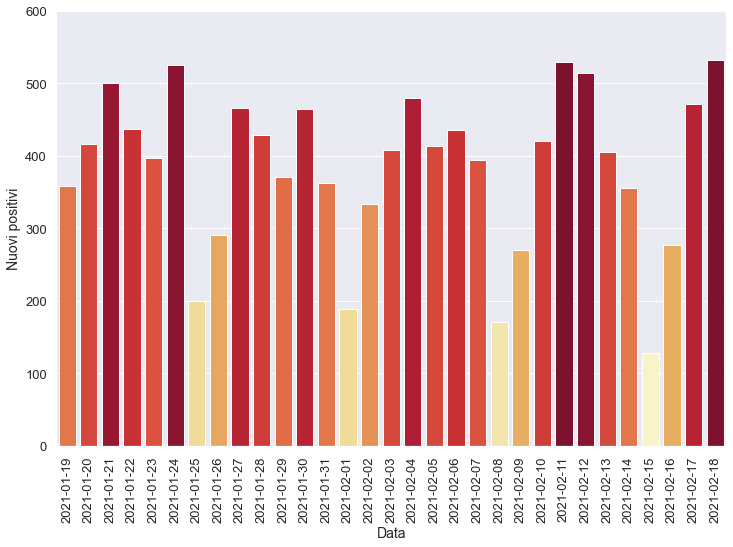

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

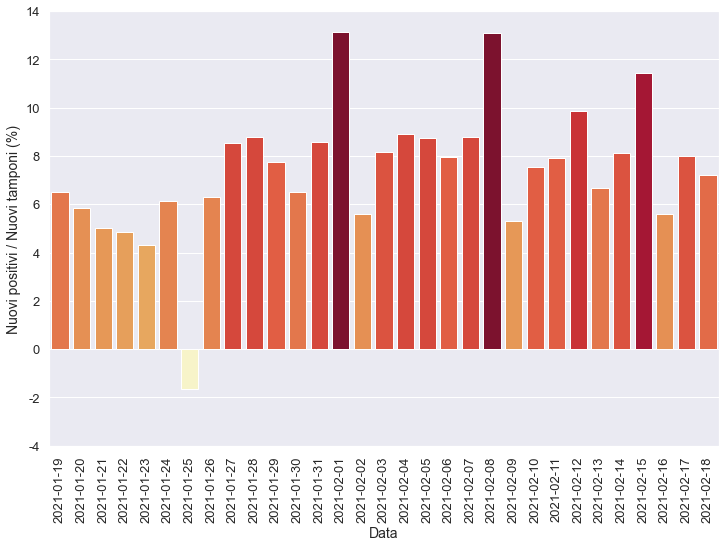

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

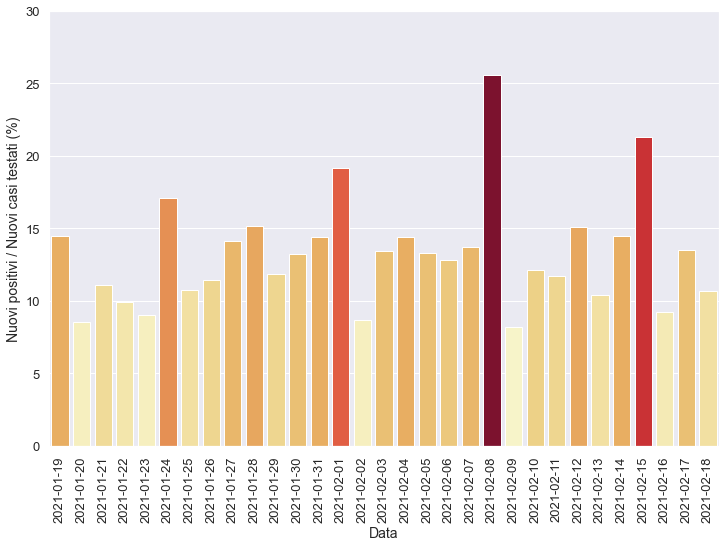

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

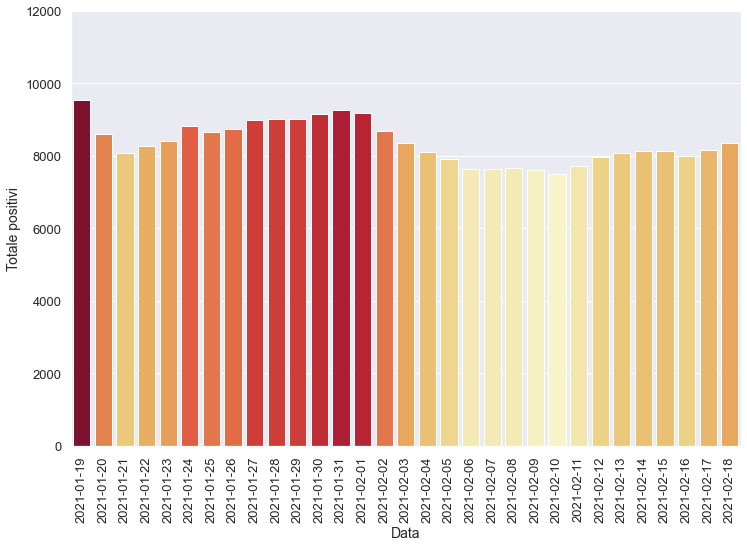

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

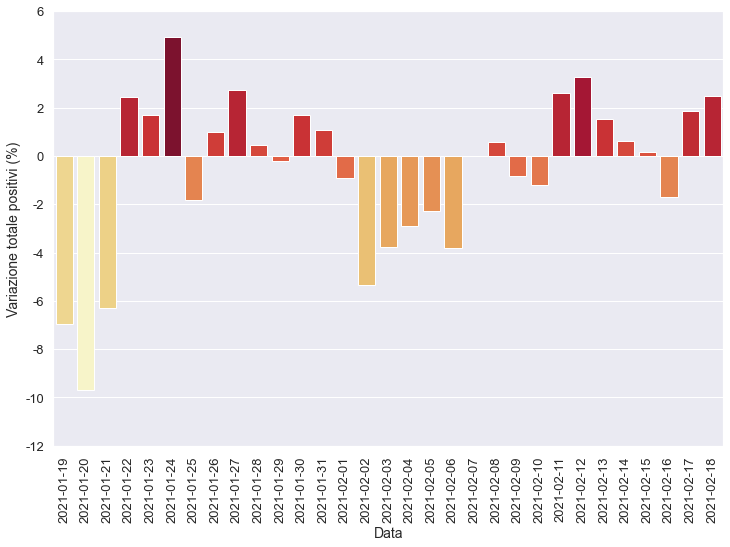

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

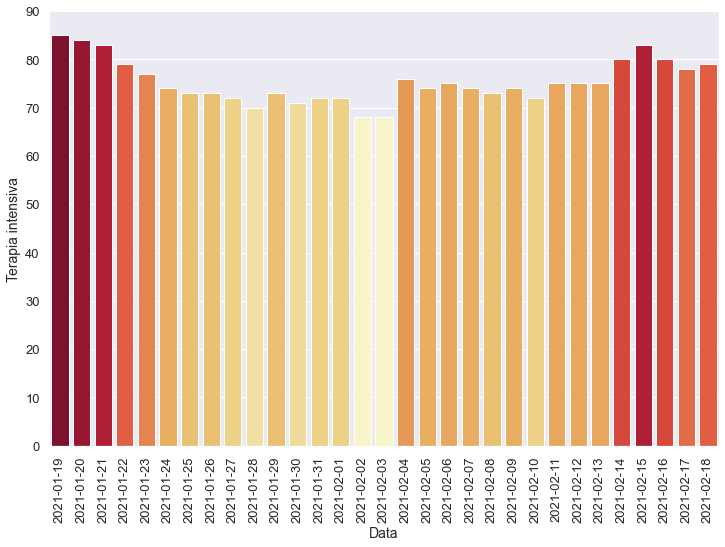

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

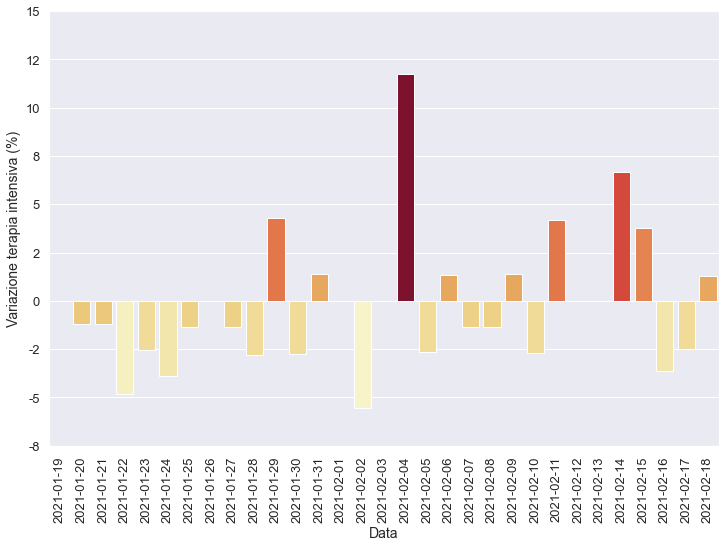

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

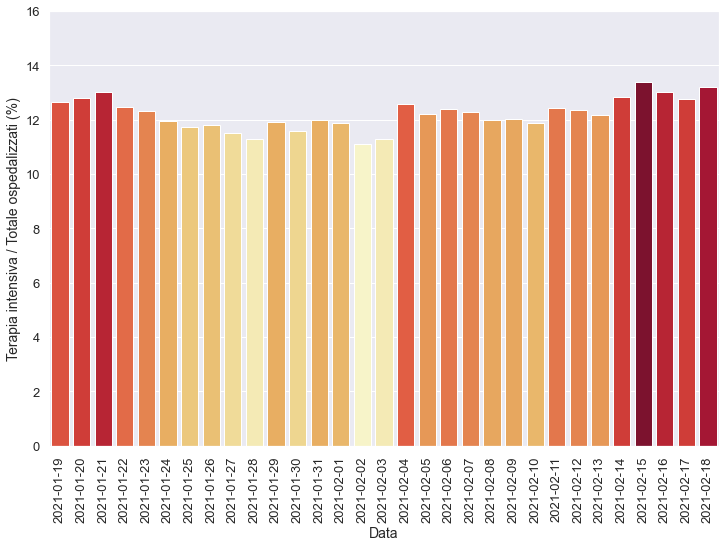

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

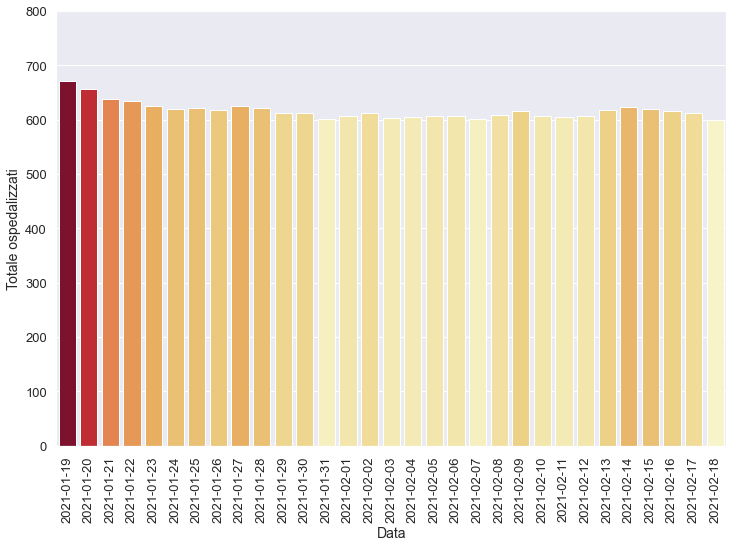

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

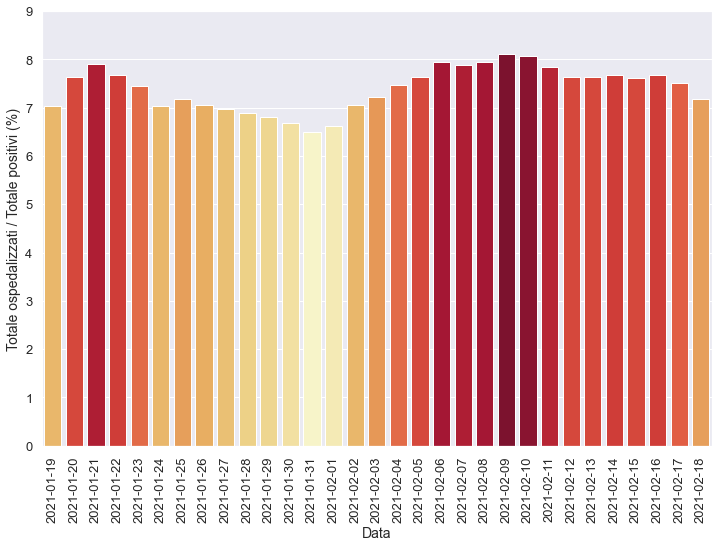

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

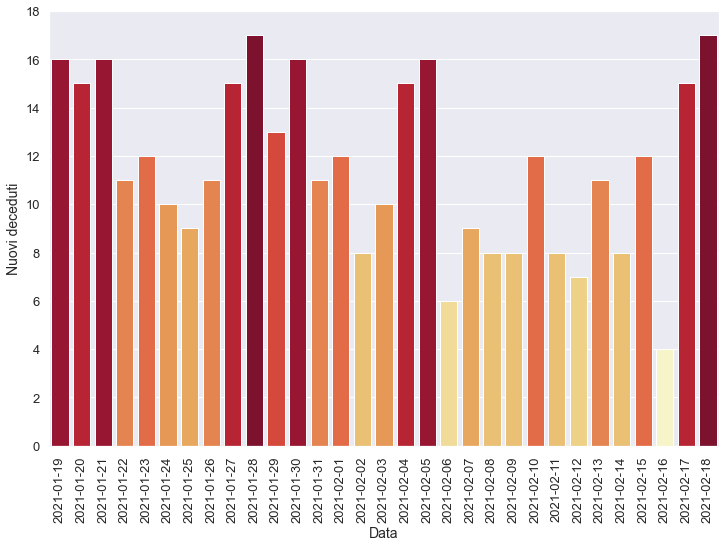

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

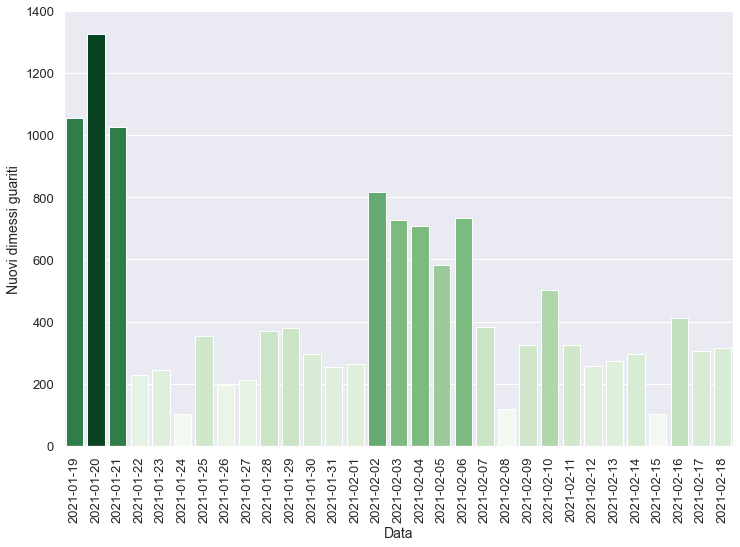

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-11T17:00:00,11,Marche,529,75,604,7104,7708,196,530,...,8.0,6685.0,4527.0,198.0,12.42,7.84,7.93,11.71,4.17,2.61
1,2021-02-12T17:00:00,11,Marche,532,75,607,7352,7959,251,515,...,7.0,5229.0,3414.0,248.0,12.36,7.63,9.85,15.08,0.00,3.26
2,2021-02-13T17:00:00,11,Marche,542,75,617,7462,8079,120,405,...,11.0,6083.0,3884.0,110.0,12.16,7.64,6.66,10.43,0.00,1.51
3,2021-02-14T17:00:00,11,Marche,544,80,624,7506,8130,51,355,...,8.0,4380.0,2455.0,44.0,12.82,7.68,8.11,14.46,6.67,0.63
4,2021-02-15T17:00:00,11,Marche,537,83,620,7524,8144,14,128,...,12.0,1120.0,601.0,18.0,13.39,7.61,11.43,21.30,3.75,0.17
5,2021-02-16T17:00:00,11,Marche,535,80,615,7390,8005,-139,277,...,4.0,4962.0,2995.0,-134.0,13.01,7.68,5.58,9.25,-3.61,-1.71
6,2021-02-17T17:00:00,11,Marche,534,78,612,7543,8155,150,471,...,15.0,5891.0,3483.0,153.0,12.75,7.50,8.00,13.52,-2.50,1.87
7,2021-02-18T17:00:00,11,Marche,520,79,599,7757,8356,201,532,...,17.0,7399.0,4994.0,214.0,13.19,7.17,7.19,10.65,1.28,2.46


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

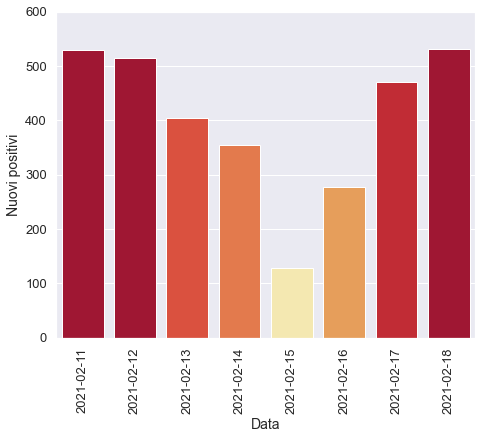

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

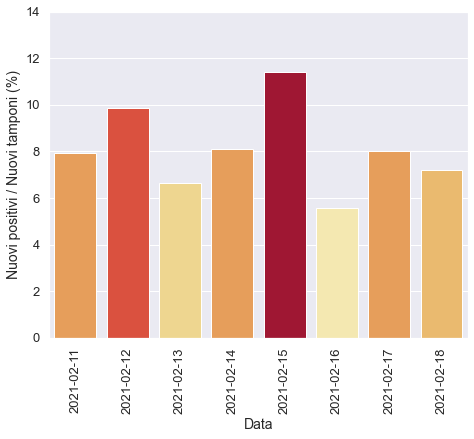

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

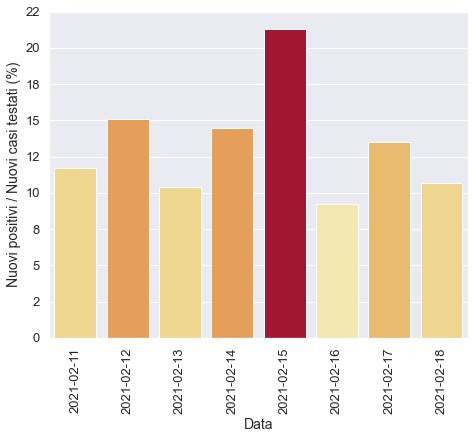

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

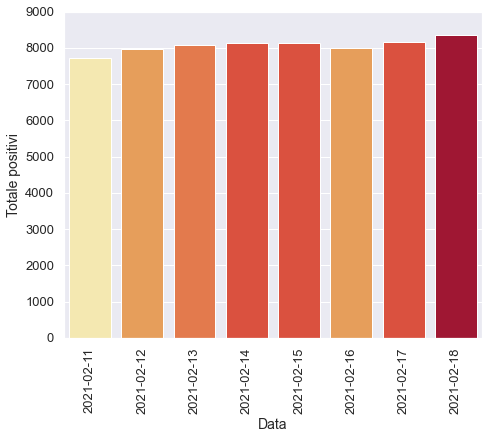

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

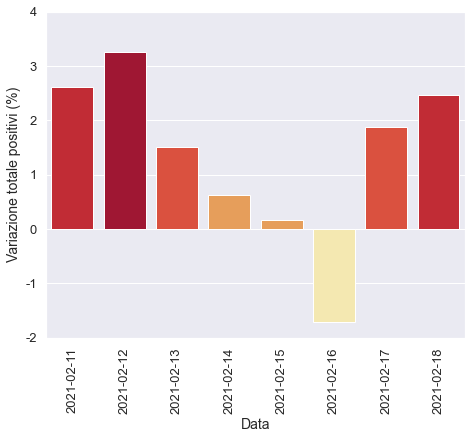

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

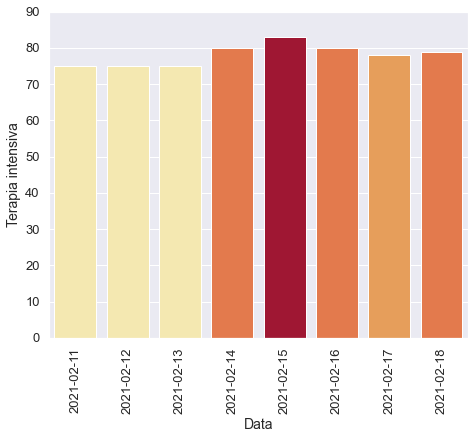

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

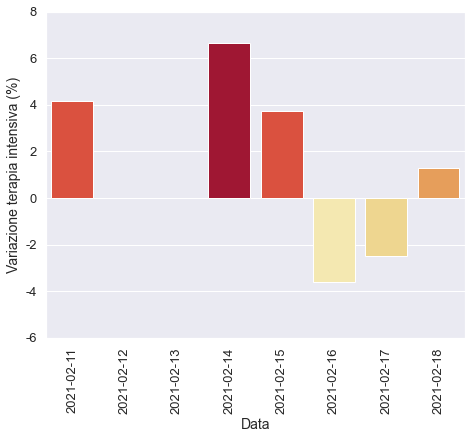

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

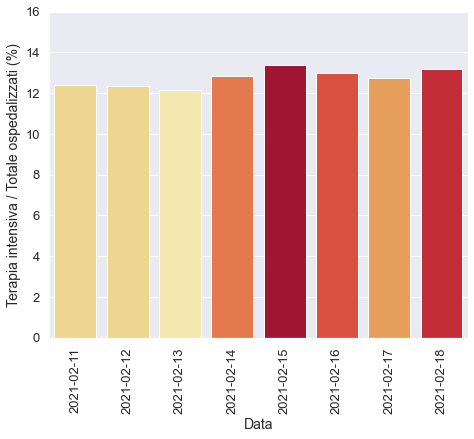

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

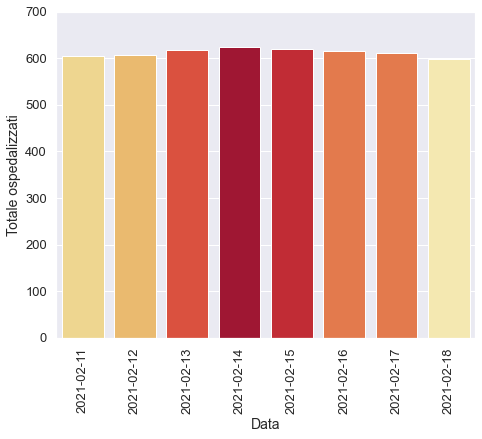

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

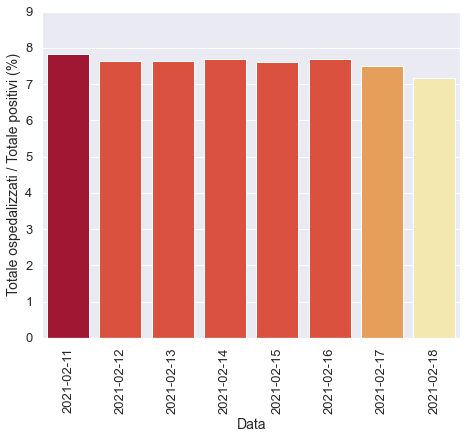

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

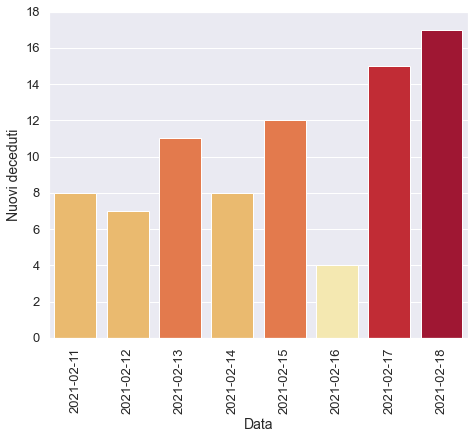

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

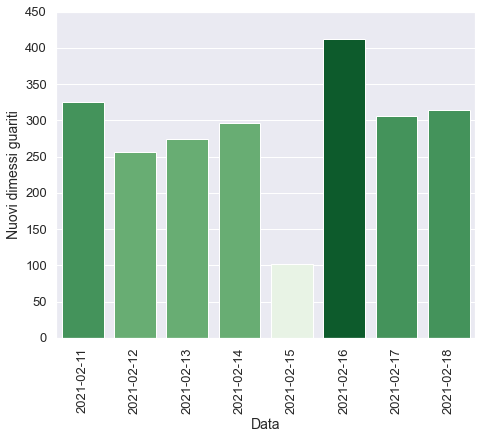

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)